# Old

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/MyCall_Data_September_2019_cleaning.csv")
df.head()


,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,4,Satisfactory,12.691526,78.635086,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,25.594805,85.220971,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,25.595471,85.221376,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,28.640839,77.229266,NCT
4,Airtel,Indoor,4G,5,Satisfactory,28.640833,77.229232,NCT


In [ ]:
df.drop(['Latitude', 'Longitude'],axis = 'columns', inplace = True)
df

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name
0,RJio,Indoor,4G,4,Satisfactory,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,NCT
4,Airtel,Indoor,4G,5,Satisfactory,NCT
...,...,...,...,...,...,...
16955,RJio,Outdoor,4G,5,Satisfactory,Maharashtra
16956,Vodafone,Outdoor,4G,2,Poor Voice Quality,Gujarat
16957,RJio,Indoor,4G,1,Call Dropped,Odisha
16958,BSNL,Travelling,2G,1,Call Dropped,Maharashtra


In [ ]:
df.rename( columns = {
    'In Out Travelling': 'InOut', 'Network Type': 'NetworkType', 'Call Drop Category': 'CallDropCategory', 'State Name': 'StateName'
}, inplace = True)

old = df.copy()

In [ ]:
obj = {
    'Operator': {'RJio':1 ,'Airtel':2,'Idea':3,'Other':4,'Vodafone':5,'BSNL':6,'MTNL':7}, 
    'InOut' : {'Indoor':1 ,'Outdoor':2,'Travelling':3}, 
    'NetworkType':  {'4G':1 ,'3G':2,'2G':3}, 
    'CallDropCategory': {'Satisfactory' : 1, 'Poor Voice Quality': 2, 'Call Dropped': 3},     
    'StateName' : {}
}

count = 1
for x in df['StateName'].unique(): 
  obj['StateName'][x] = count
  count += 1

In [ ]:
obj

{'CallDropCategory': {'Call Dropped': 3,
  'Poor Voice Quality': 2,
  'Satisfactory': 1},
 'InOut': {'Indoor': 1, 'Outdoor': 2, 'Travelling': 3},
 'NetworkType': {'2G': 3, '3G': 2, '4G': 1},
 'Operator': {'Airtel': 2,
  'BSNL': 6,
  'Idea': 3,
  'MTNL': 7,
  'Other': 4,
  'RJio': 1,
  'Vodafone': 5},
 'StateName': {'Andaman and Nicobar Islands': 25,
  'Andhra Pradesh': 14,
  'Assam': 21,
  'Bihar': 2,
  'Chandigarh': 6,
  'Chhattisgarh': 19,
  'Goa': 23,
  'Gujarat': 11,
  'Haryana': 16,
  'Himachal Pradesh': 24,
  'Jharkhand': 15,
  'Karnataka': 12,
  'Kerala': 13,
  'Lower Saxony': 20,
  'Madhya Pradesh': 9,
  'Maharashtra': 5,
  'NCT': 3,
  'Odisha': 22,
  'Punjab': 7,
  'Rajasthan': 17,
  'Tamil Nadu': 1,
  'Telangana': 10,
  'Uttar Pradesh': 4,
  'Uttarakhand': 18,
  'West Bengal': 8}}

In [ ]:
#Do not run this code two times, otherwise the map function will convert all nonmatched values to NaN

df['Operator'] = df['Operator'].map( {'RJio':1 ,'Airtel':2,'Idea':3,'Other':4,'Vodafone':5,'BSNL':6,'MTNL':7} )

df['InOut'] = df['InOut'].map( {'Indoor':1 ,'Outdoor':2,'Travelling':3} )

df['NetworkType'] = df['NetworkType'].map( {'4G':1 ,'3G':2,'2G':3} )

df['CallDropCategory'] = df['CallDropCategory'].map( {'Satisfactory' : 1, 'Poor Voice Quality': 2, 'Call Dropped': 3} )

df['StateName'] = df['StateName'].map(obj['StateName'])

df

,Operator,InOut,NetworkType,Rating,CallDropCategory,StateName
0,1,1,1,4,1,1
1,2,2,1,5,1,2
2,2,1,1,5,1,2
3,2,1,1,4,1,3
4,2,1,1,5,1,3
...,...,...,...,...,...,...
16955,1,2,1,5,1,5
16956,5,2,1,2,2,11
16957,1,1,1,1,3,22
16958,6,3,3,1,3,5


In [ ]:
X = df.columns.tolist()
X.remove('CallDropCategory')
X = df[X]
y = df['CallDropCategory']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

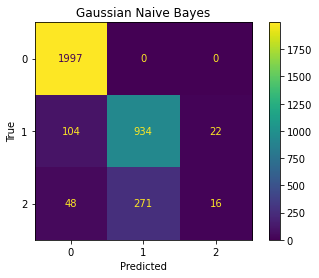

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussNb = GaussianNB()
gaussNb.fit(X_train.values, y_train)
 
# predicting test set results
y_pred = gaussNb.predict(X_test)
 
# making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)

cmd.plot()
#cmd.ax_.set_title('title')
cmd.ax_.set_title( 'Gaussian Naive Bayes')
cmd.ax_.set(xlabel='Predicted', ylabel='True')



In [ ]:
#saving the model as pickel module

with open('/content/drive/MyDrive/Colab Notebooks/SavedModels/gaussNb_model.pkl', 'wb') as file: 
  pickle.dump(gaussNb, file)

In [ ]:
print("\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print ( metrics.classification_report(y_test, y_pred)  ) 
gaussNbMetric = metrics.classification_report(y_test, y_pred)


Gaussian Naive Bayes model accuracy(in %): 86.88089622641509
              precision    recall  f1-score   support

           1       0.93      1.00      0.96      1997
           2       0.78      0.88      0.82      1060
           3       0.42      0.05      0.09       335

    accuracy                           0.87      3392
   macro avg       0.71      0.64      0.62      3392
weighted avg       0.83      0.87      0.83      3392



In [ ]:
pick_read = open('/content/drive/MyDrive/Colab Notebooks/SavedModels/gaussNb_model.pkl','rb')
data = pickle.load(pick_read)
y_pred = data.predict(X_test)

print("\nchecking pickel(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print ( metrics.classification_report(y_test, y_pred)  ) 
gaussNbMetric = metrics.classification_report(y_test, y_pred)


checking pickel(in %): 86.88089622641509
              precision    recall  f1-score   support

           1       0.93      1.00      0.96      1997
           2       0.78      0.88      0.82      1060
           3       0.42      0.05      0.09       335

    accuracy                           0.87      3392
   macro avg       0.71      0.64      0.62      3392
weighted avg       0.83      0.87      0.83      3392



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

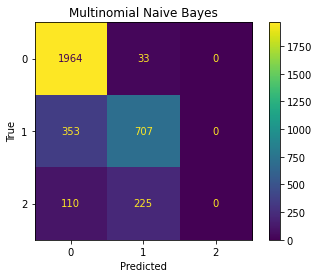

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MultiNb = MultinomialNB()
MultiNb.fit(X_train.values, y_train)

y_pred = MultiNb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)

cmd.plot()
#cmd.ax_.set_title('title')
cmd.ax_.set_title( 'Multinomial Naive Bayes')
cmd.ax_.set(xlabel='Predicted', ylabel='True')




In [ ]:
print ( metrics.classification_report(y_test, y_pred) ) 

              precision    recall  f1-score   support

           1       0.81      0.98      0.89      1997
           2       0.73      0.67      0.70      1060
           3       0.00      0.00      0.00       335

    accuracy                           0.79      3392
   macro avg       0.51      0.55      0.53      3392
weighted avg       0.71      0.79      0.74      3392



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("\Multinomail Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print ( metrics.classification_report(y_test, y_pred)  ) 

\Multinomail Naive Bayes model accuracy(in %): 78.74410377358491
              precision    recall  f1-score   support

           1       0.81      0.98      0.89      1997
           2       0.73      0.67      0.70      1060
           3       0.00      0.00      0.00       335

    accuracy                           0.79      3392
   macro avg       0.51      0.55      0.53      3392
weighted avg       0.71      0.79      0.74      3392



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Implementing our gradio app

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
old

,Operator,InOut,NetworkType,Rating,CallDropCategory,StateName
0,RJio,Indoor,4G,4,Satisfactory,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,NCT
4,Airtel,Indoor,4G,5,Satisfactory,NCT
...,...,...,...,...,...,...
16955,RJio,Outdoor,4G,5,Satisfactory,Maharashtra
16956,Vodafone,Outdoor,4G,2,Poor Voice Quality,Gujarat
16957,RJio,Indoor,4G,1,Call Dropped,Odisha
16958,BSNL,Travelling,2G,1,Call Dropped,Maharashtra


In [ ]:
temp = [[1, 1, 1, 1, 1]]
gaussNb.predict( temp )[0]  

2

In [ ]:
x =  metrics.classification_report(y_test, y_pred, output_dict=True)  
met1 = pd.DataFrame(x).transpose()


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
met1
temp2 = met1
#temp2.reset_index()
#temp2.columns
temp2 = temp2.reset_index()
ls = ['Satisfactory', 'Poor Voice Quality', 'Call Dropped', 'accuracy', 'macro avg', 'weighted avg']
temp_df  = pd.DataFrame(ls)
temp2['index'] = temp_df
temp2

,index,precision,recall,f1-score,support
0,Satisfactory,0.809230,0.983475,0.887884,1997.000000
1,Poor Voice Quality,0.732642,0.666981,0.698272,1060.000000
2,Call Dropped,0.000000,0.000000,0.000000,335.000000
3,accuracy,0.787441,0.787441,0.787441,0.787441
4,macro avg,0.513957,0.550152,0.528719,3392.000000
5,weighted avg,0.705375,0.787441,0.740941,3392.000000


All the things needed for the gradio function but not need to be included in the functinon. So to make the function less cluttered write the other things here. 

In [ ]:
dict1 =  {1 : 'Satisfactory' , 2: 'Poor Voice Quality', 3: 'Call Dropped'}
x =  metrics.classification_report(y_test, y_pred, output_dict=True)  
x_after = pd.DataFrame(x).transpose()
x_after = x_after.reset_index()
ls = ['Satisfactory', 'Poor Voice Quality', 'Call Dropped', 'accuracy', 'macro avg', 'weighted avg']
temp_df  = pd.DataFrame(ls)
x_after['index'] = temp_df
head = list ( x_after.columns ) 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print ( ' hello world')

 hello world


In [ ]:
def fun1(operator, inout, networktype, rating, statename): 
  temp = [[ obj['Operator'][operator], obj['InOut'][inout], obj['NetworkType'][networktype], rating, obj['StateName'][statename] ]]
  ans1 = gaussNb.predict( temp ) [0] 
  
  ans2 = MultiNb.predict( temp )[0]    
  return ( dict1[ans1], dict1[ans2], x_after ) 
  

In [ ]:
d= old.groupby(['Operator','CallDropCategory']).size()
d = d.reset_index()
d = d.rename(columns = {0 : 'Calls Dropped'} )
d = d[
      d['Operator'] == 'Idea'  
    ] 

print(d.to_string(index=False))

'''
from IPython.display import HTML
HTML(d.to_html(index=False))


if type(d) == 'IPython.core.display.HTML': 
  print('yeah')
else: 
  print('nah')
type(d)
'''

Operator   CallDropCategory  Calls Dropped
    Idea       Call Dropped            167
    Idea Poor Voice Quality            319
    Idea       Satisfactory            777


"\nfrom IPython.display import HTML\nHTML(d.to_html(index=False))\n\n\nif type(d) == 'IPython.core.display.HTML': \n  print('yeah')\nelse: \n  print('nah')\ntype(d)\n"

In [ ]:

def fun2(operator, inout, networktype, rating, statename): 
  d = old.groupby(['StateName']).size()
  d = d.reset_index()
  d = d[d['StateName'] == statename][0].to_string(index=False)
  statename_ans = 'Your state has ' + str(d) + ' calls'

  d = old.groupby(['Operator']).size()
  d = d.reset_index()
  d = d[d['Operator'] == operator ][0].to_string(index=False)
  operator_ans = 'Your operator has ' + str(d) + ' calls'

  d = old.groupby(['NetworkType']).size()
  d = d.reset_index()
  d = d[d['NetworkType'] == networktype][0].to_string(index=False)
  networktype_ans = 'Your network type has ' + str(d) + ' calls'

  ans1 = str( old[
              (old['StateName'] == statename) &
              (old['Operator'] == operator) &
              (old['NetworkType'] == networktype) &
              (old['InOut'] == inout)
              ].shape[0] ) 
  ans1 = 'In ' + statename + ' with operator ' + operator + ' with a ' + networktype + ' connection and while being ' + inout + ', there are total ' + ans1 + ' calls. '
  
  #checked till here
  d= old.groupby(['Operator','CallDropCategory']).size()
  d = d.reset_index()
  d = d.rename(columns = {0 : 'Calls Dropped'} )
  d = d[
        d['Operator'] == 'Idea'  
      ]   
  ans2 = d

  ls = [statename_ans, operator_ans, networktype_ans, ans1, ans2]
  for x in ls: 
    if type(x) != str: 
      print(x.to_string(index=False))
    else: 
      print(x)

fun2('Airtel', 'Outdoor', '4G', 3, 'Uttar Pradesh')   

Your state has 1760 calls
Your operator has 4114 calls
Your network type has 14638 calls
In Uttar Pradesh with operator Airtel with a 4G connection and while being Outdoor, there are total 37 calls. 
Operator   CallDropCategory  Calls Dropped
    Idea       Call Dropped            167
    Idea Poor Voice Quality            319
    Idea       Satisfactory            777


In [ ]:
#temp = list ( df['Rating'].unique() ) 
interface = gr.Interface(
    fn = fun1,
    inputs = [ gr.inputs.Dropdown(list( obj['Operator'].keys() ) , label = 'Select an Operator' ),
              gr.inputs.Dropdown(list( obj['InOut'].keys() ) , label = 'Indoor, outdoor, or travelling' ),
              gr.inputs.Dropdown(list( obj['NetworkType'].keys() ) , label = 'Select your network type' ),
              gr.inputs.Dropdown( [1,2,3,4,5] , label = 'Select your rating' ),              
              gr.inputs.Dropdown(list( obj['StateName'].keys() ) , label = 'Select the State' ),              
              ], 
    outputs = [
               gr.outputs.Textbox(label = 'Gaussian NB'), 
               gr.outputs.Textbox(label = 'MultiNB'),
               gr.outputs.Dataframe(label='Accuracy', headers = head)

    ], 
    theme = 'dark-huggingface')    

#interface.launch(debug = True)

# **Streamlit application**


In [ ]:
!pip install streamlit -q

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 4.3 MB 46.2 MB/s 
     |████████████████████████████████| 111 kB 44.3 MB/s 
     |████████████████████████████████| 181 kB 48.1 MB/s 
     |████████████████████████████████| 164 kB 29.7 MB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 130 kB 53.1 MB/s 
     |████████████████████████████████| 793 kB 49.9 MB/s 
     |████████████████████████████████| 428 kB 60.2 MB/s 
     |████████████████████████████████| 1.1 MB 41.4 MB/s 
     |████████████████████████████████| 130 kB 23.5 MB/s 
     |████████████████████████████████| 380 kB 45.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which 

In [ ]:
!pip install --upgrade streamlit

In [ ]:
pick_read = open('/content/drive/MyDrive/Colab Notebooks/SavedModels/gaussNb_model.pkl','rb')
data = pickle.load(pick_read)


In [ ]:
%%writefile app.py
import streamlit as st
from predict_page import show_predict_page
from models_page import show_models_page
from explore_page import show_explore_page

page = st.sidebar.selectbox("Features", ("Predict", "Explore", "Models"))
if page == "Explore": 
  show_explore_page()
elif page == "Models": 
  show_models_page()
else:
  show_predict_page()

Writing app.py


In [ ]:
%%writefile models_page.py
import streamlit as st
import pickle 
import numpy as np
import pandas as pd

def show_models_page(): 
  st.write(""" # You are inside Models page """)

Writing models_page.py


In [ ]:
%%writefile explore_page.py
import streamlit as st
import pickle 
import numpy as np
import pandas as pd

def show_explore_page(): 
  if "flag" not in st.session_state: 
    st.title(""" Please select your inputs from Predict page and click predict """)    
  else: 
    st.title("""  You are inside explore page """)

    # reding the data set
    df = pd.read_csv("/content/drive/MyDrive/datasets/MyCall_Data_September_2019_cleaning.csv")
    df.drop(['Latitude', 'Longitude'],axis = 'columns', inplace = True)
    df.rename( columns = {
    'In Out Travelling': 'InOut', 'Network Type': 'NetworkType', 'Call Drop Category': 'CallDropCategory', 'State Name': 'StateName'},
     inplace = True)
    old = df.copy()



    # setting the user selected attributes
    operator = st.session_state.operator    
    inout = st.session_state.inout  
    networktypes = st.session_state.network 
    statename = st.session_state.state     
    ratings = st.session_state.rating  


    # displaying the results    
    d = old.groupby(['StateName']).size()
    d = d.reset_index()
    d = d[d['StateName'] == statename][0].to_string(index=False)
    st.write ( """ ### statename + " has made " + str(d) + " calls" """ )  

Overwriting explore_page.py


In [ ]:
%%writefile predict_page.py
import streamlit as st
import pickle 
import numpy as np
import pandas as pd



df = pd.read_csv("/content/drive/MyDrive/datasets/MyCall_Data_September_2019_cleaning.csv")
df.drop(['Latitude', 'Longitude'],axis = 'columns', inplace = True)
df.rename( columns = {'In Out Travelling': 'InOut', 'Network Type': 'NetworkType', 'Call Drop Category': 'CallDropCategory', 'State Name': 'StateName'}, inplace = True)
obj = {
'Operator': {'RJio':1 ,'Airtel':2,'Idea':3,'Other':4,'Vodafone':5,'BSNL':6,'MTNL':7}, 
'InOut' : {'Indoor':1 ,'Outdoor':2,'Travelling':3}, 
'NetworkType':  {'4G':1 ,'3G':2,'2G':3}, 
'CallDropCategory': {'Satisfactory' : 1, 'Poor Voice Quality': 2, 'Call Dropped': 3},     
'StateName' : {} }

count = 1
for x in df['StateName'].unique(): 
  obj['StateName'][x] = count
  count += 1

dict1 =  {1 : 'Satisfactory' , 2: 'Poor Voice Quality', 3: 'Call Dropped'}

def load_model(): 
	pick_read = open('/content/drive/MyDrive/Colab Notebooks/SavedModels/gaussNb_model.pkl','rb')
	data = pickle.load(pick_read)
	return data



def show_predict_page():
	gaussNb = load_model()
	st.title("Call Drop Analysis")	
	st.write(""" ###### Analysed information based on the user inputs. These inputs will be paased to our pre trained model. """)
	
	operator = st.selectbox( "Operator", list ( obj['Operator'].keys() ) ) 
	inout = st.selectbox ("Travelling type", list ( obj['InOut'].keys() ) ) 
	network = st.selectbox ("Network",  list ( obj['NetworkType'].keys() )  ) 
	state = st.selectbox("State", list ( obj['StateName'].keys() ) )
	rating = st.slider("Rating", 1, 5, 1); 

	btn = st.button('Precit Call Drop')
	if btn:
		temp = [[ obj['Operator'][operator], obj['InOut'][inout], obj['NetworkType'][network], rating, obj['StateName'][state] ]]
		ans = gaussNb.predict(temp)[0]		
		st.subheader("Predicted category by gaussian NB: " + dict1[ans] )	
		st.session_state.flag  = True
		st.session_state.operator = operator
		st.session_state.inout = inout
		st.session_state.network = network
		st.session_state.state = state
		st.session_state.rating = rating


Writing predict_page.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-04-02 03:32:23.663 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.227.63.183:8501

npx: installed 22 in 4.645s
your url is: https://ugly-badger-12.loca.lt
  Stopping...
^C
